In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random

In [3]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [12]:
data = ['a7a6', 'a2a3', 'b7b6']

In [5]:
path=("stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nunni\AppData\Local\Temp\ipykernel_5352\315037162.py:1: SyntaxWarning: invalid escape sequence '\s'
  path=("stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")


In [6]:
fen=("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [24]:

def stockfish_evaluation(board, time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score']

In [8]:
def evaluate_move(stockfish,fen,move):
    board = chess.Board(fen)
    board.push_uci(move)
    return stockfish_evaluation(board)

stockfish = Stockfish(path)

In [23]:
score_ensemble = []
for i in range(len(data)):
    move = data[i]
    fen = df['FEN'][i]
    if 'w' in fen:
        end = evaluate_move(stockfish, fen, move).white().score()
        score_ensemble.append(end - int(df['Evaluation'][i]))
    else:
        end = evaluate_move(stockfish, fen, move).black().score()
        score_ensemble.append(end - int(df['Evaluation'][i]))

print(score_ensemble)

[-61, -51, -88]


['a7a6', 'a2a3', 'b7b6']


c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


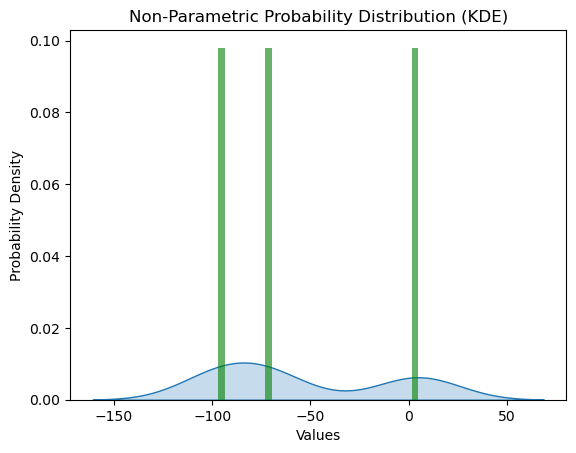

In [17]:
# Generate some sample data (e.g., from a normal distribution)
d = score_ensemble
print(data)

# Plot the KDE using seaborn
sns.kdeplot(d, bw_adjust=0.5, fill=True)
plt.hist(d, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Non-Parametric Probability Distribution (KDE)')
plt.show()